In [21]:
custom_data_home = "../DataSet"
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn import metrics, cluster



In [30]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [38]:
#Gardons que les 50 premiers chiffres et leurs pixels associés. 
X_1000 = X[:1000]
print(X_1000)
y_1000 = y[:1000]
#print(y_1000)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [33]:
# 1. Choisissons le clustering avec kmeans
from sklearn import cluster
myclust = cluster.KMeans(n_clusters=10)
myclust.fit(X_1000)

KMeans(n_clusters=10)

In [42]:
# 2. Visualisation
# On commence par réduire la dimension des données avec tSNE. On scale d’abord les données :
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_1000)
X_scaled = std_scale.transform(X_1000)

In [43]:
# Puis on applique tSNE aux données scalées :
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca')
X_trans = tsne.fit_transform(X_scaled)

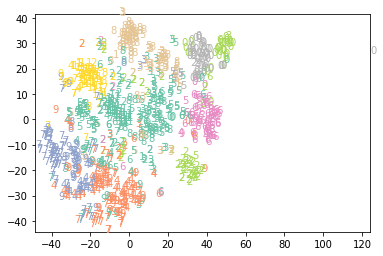

In [46]:
# Puis on visualise, selon la méthode donnée dans le coup de pouce :
from matplotlib import pyplot as plt # Dans Jupyter : % pylab inline
plt.figure()
for i in range(X_1000.shape[0]): # pour chaque point
    plt.text(X_trans[i, 0], X_trans[i, 1], str(y_1000[i]),
            color=plt.cm.Set2(myclust.labels_[i]/10.))


# On redéfinit les axes pour bien voir tous les points
plt.xlim([np.min(X_trans[:, 0]), np.max(X_trans[:, 0])])
plt.ylim([np.min(X_trans[:, 1]), np.max(X_trans[:, 1])])

# On affiche l'image
plt.show()

In [47]:
# 3. Évaluation
# Pour l’évaluation intrinsèque, je choisis le coefficient de silhouette :
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_1000, myclust.labels_))

# Pour la comparaison aux étiquettes, je choisis l’indice de Rand ajusté :
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_1000, myclust.labels_))

Silhouette Coefficient: 0.085
Adjusted Rand Index: 0.306
